# Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

In [1]:
# Import libraries
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Define the path to your dataset
dataset_path = 'C:/Users/Tejas/Desktop/PRODIGY_ML_03/Dataset'

In [3]:
# Define the size to which each image will be resized
image_size = (64, 64)

In [4]:
# Function to load and preprocess the images
def load_images(dataset_path, image_size):
    images = []
    labels = []
    original_images = []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    original_images.append(image)
                    image = cv2.resize(image, image_size)
                    image = image.flatten()
                    images.append(image)
                    labels.append(label)
    return np.array(images), np.array(labels), original_images

In [5]:
# Load the images and labels, along with the original images
images, labels, original_images = load_images(dataset_path, image_size)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test, original_train, original_test = train_test_split(images, labels, original_images, test_size=0.2, random_state=42)

In [7]:
# Create an SVM classifier
classifier = svm.SVC(kernel='linear')

In [8]:
# Train the SVM classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
# Predict the labels for the test set
y_pred = classifier.predict(X_test)

In [10]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5265459088069956
Classification Report:
              precision    recall  f1-score   support

         Cat       0.53      0.58      0.56       819
         Dog       0.52      0.47      0.49       782

    accuracy                           0.53      1601
   macro avg       0.53      0.53      0.52      1601
weighted avg       0.53      0.53      0.53      1601



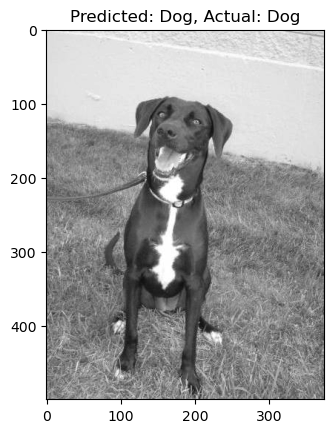

In [11]:
# Display one correctly classified image
correct_indices = np.where(y_pred == y_test)[0]

if correct_indices.size > 0:
    index = correct_indices[0]
    correct_image = original_test[index]
    predicted_label = y_pred[index]
    actual_label = y_test[index]

    plt.imshow(correct_image, cmap='gray')
    plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
    plt.show()
else:
    print('No correct classifications found.')